<a href="https://colab.research.google.com/github/vinarestanti/Praktikum-vina_G.231.22.0044/blob/main/Praktikum8_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

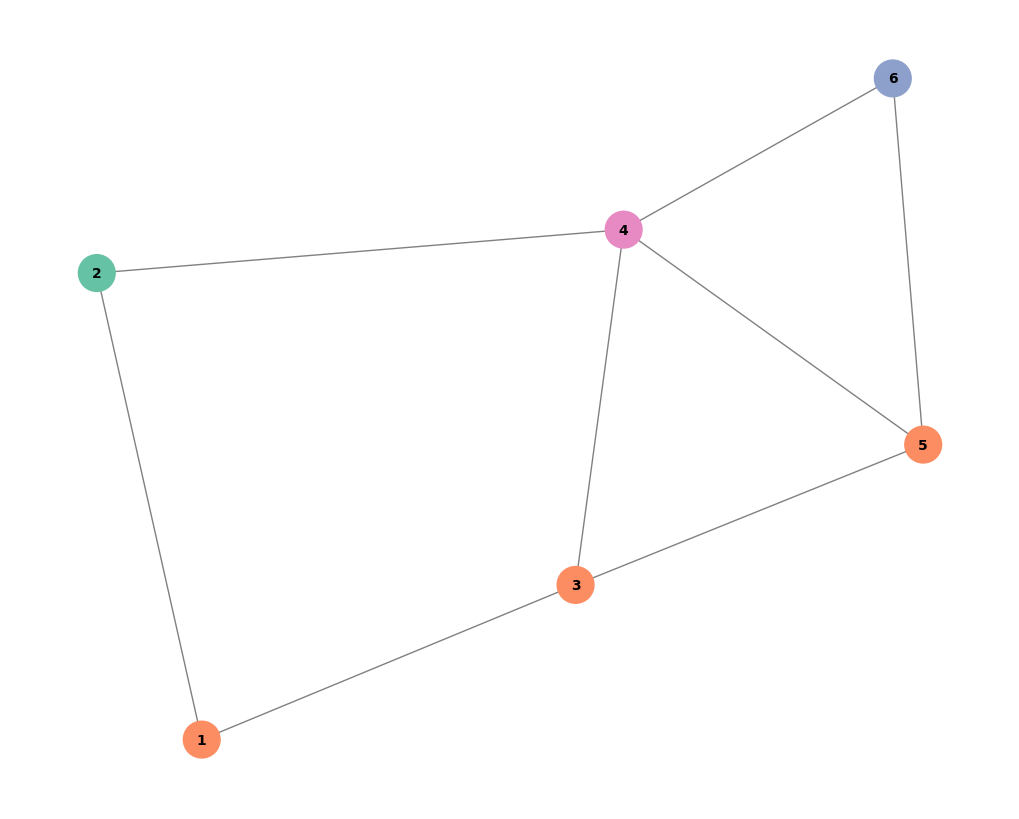


Bellman-Ford Shortest Distances:
Shortest distance from node 1 to node 1: 0
Shortest distance from node 1 to node 2: 1
Shortest distance from node 1 to node 3: 2
Shortest distance from node 1 to node 4: 2
Shortest distance from node 1 to node 5: 3
Shortest distance from node 1 to node 6: 5


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

class Graph:
    def __init__(self):
        self.graph = nx.Graph()

    def add_edge(self, u, v, weight):
        self.graph.add_edge(u, v, weight=weight)

    def bellman_ford(self, source):
        distances = {node: float('infinity') for node in self.graph.nodes}
        distances[source] = 0

        for _ in range(len(self.graph.nodes) - 1):
            for u, v, data in self.graph.edges(data=True):
                if distances[u] != float('infinity') and distances[u] + data['weight'] < distances[v]:
                    distances[v] = distances[u] + data['weight']

        return distances

    def draw_colored_graph(self, pos, node_colors=None, edge_colors=None, node_labels=None):
        nx.draw(self.graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color=node_colors, font_color='black', font_size=10, edge_color=edge_colors, connectionstyle='arc3,rad=0.1', labels=node_labels)

# Membuat objek graf
g = Graph()

# Menambahkan sisi (edge) dengan bobot
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 2)
g.add_edge(2, 4, 1)
g.add_edge(3, 4, 3)
g.add_edge(3, 5, 2)
g.add_edge(4, 5, 1)
g.add_edge(4, 6, 4)
g.add_edge(5, 6, 2)

# Menampilkan graf menggunakan Matplotlib dengan warna yang berbeda-beda untuk setiap simpul
pos = nx.spring_layout(g.graph)
node_colors = [random.choice(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']) for _ in g.graph.nodes]
edge_colors = 'gray'

# Menampilkan graf dengan warna yang berbeda-beda untuk setiap simpul
plt.figure(figsize=(10, 8))
g.draw_colored_graph(pos, node_colors=node_colors, edge_colors=edge_colors)

# Menyimpan gambar
plt.savefig("graph_bellman_ford_colored.png")

# Menampilkan gambar
plt.show()

# Algoritma Bellman-Ford untuk mencari jalur terpendek
source_node = 1
shortest_distances = g.bellman_ford(source_node)

# Menampilkan hasil
print("\nBellman-Ford Shortest Distances:")
for node, distance in shortest_distances.items():
    print(f"Shortest distance from node {source_node} to node {node}: {distance}")


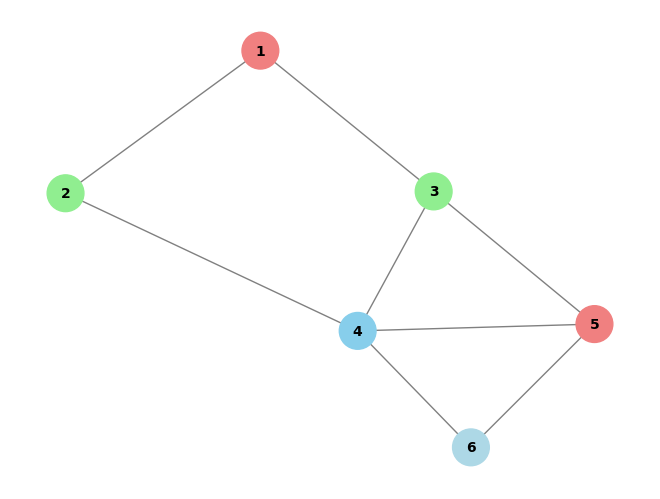


Dijkstra Shortest Paths:
Shortest path from node 1 to node 1: [1] with Length 0
Shortest path from node 1 to node 2: [1, 2] with Length 1
Shortest path from node 1 to node 3: [1, 3] with Length 2
Shortest path from node 1 to node 4: [1, 2, 4] with Length 2
Shortest path from node 1 to node 5: [1, 2, 4, 5] with Length 3
Shortest path from node 1 to node 6: [1, 2, 4, 5, 6] with Length 5


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

class Graph:
    def __init__(self):
        self.graph = nx.Graph()

    def add_edge(self, u, v, weight):
        self.graph.add_edge(u, v, weight=weight)

    def dijkstra_shortest_path(self, source):
        shortest_paths = nx.single_source_dijkstra_path(self.graph, source, weight='weight')
        shortest_path_lengths = nx.single_source_dijkstra_path_length(self.graph, source, weight='weight')
        return shortest_paths, shortest_path_lengths

    def draw_graph(self, pos, node_colors=None, edge_colors=None):
        nx.draw(self.graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color=node_colors, font_color='black', font_size=10, edge_color=edge_colors, connectionstyle='arc3,rad=0.1')

# Membuat objek graf
g = Graph()

# Menambahkan sisi (edge) dengan bobot
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 2)
g.add_edge(2, 4, 1)
g.add_edge(3, 4, 3)
g.add_edge(3, 5, 2)
g.add_edge(4, 5, 1)
g.add_edge(4, 6, 4)
g.add_edge(5, 6, 2)

# Algoritma Dijkstra untuk mencari jalur terpendek dari simpul 1
source_node = 1
shortest_paths, shortest_path_lengths = g.dijkstra_shortest_path(source_node)

# Membuat warna simpul yang berbeda untuk hasil visual yang lebih menarik
node_colors = [random.choice(['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']) for _ in g.graph.nodes]

# Menampilkan graf menggunakan Matplotlib dengan warna simpul yang telah dibuat
pos = nx.spring_layout(g.graph)
g.draw_graph(pos, node_colors=node_colors, edge_colors='gray')

# Menampilkan gambar
plt.savefig("graph_dijkstra_colored.png")
plt.show()

# Menampilkan hasil jalur terpendek dari simpul 1
print("\nDijkstra Shortest Paths:")
for node, path in shortest_paths.items():
    path_length = shortest_path_lengths[node]
    print(f"Shortest path from node {source_node} to node {node}: {path} with Length {path_length}")
